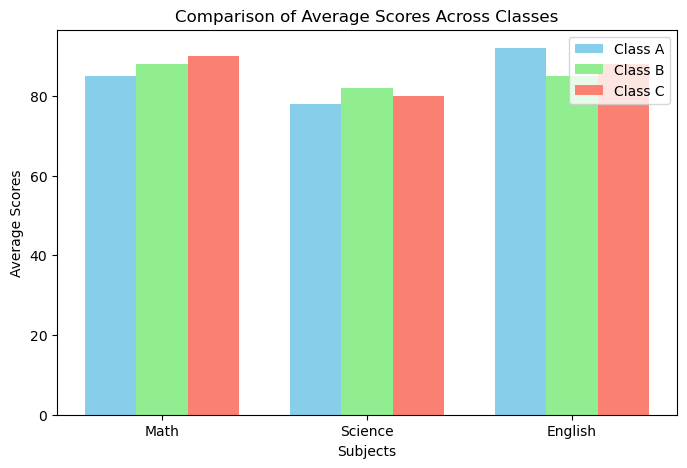

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
subjects = ['Math', 'Science', 'English']
class_A = [85, 78, 92]
class_B = [88, 82, 85]
class_C = [90, 80, 88]

# Posisi batang sumbu X
x = np.arange(len(subjects))
width = 0.25  # lebar tiap batang

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width, class_A, width, label='Class A', color='skyblue')
plt.bar(x, class_B, width, label='Class B', color='lightgreen')
plt.bar(x + width, class_C, width, label='Class C', color='salmon')

# Label dan judul
plt.xlabel('Subjects')
plt.ylabel('Average Scores')
plt.title('Comparison of Average Scores Across Classes')
plt.xticks(x, subjects)  
plt.legend()

plt.show()


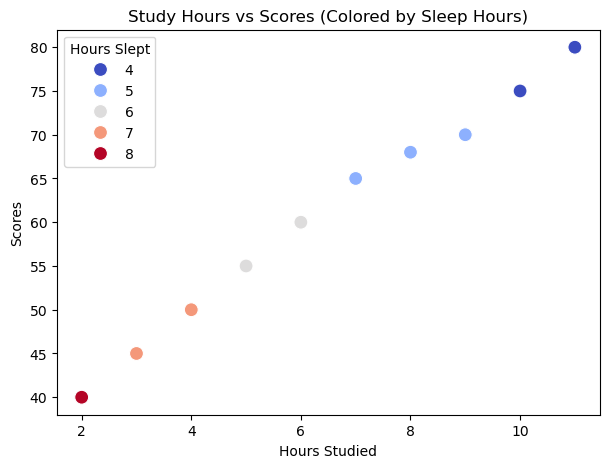

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data
data = {
    'Hours Studied': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Hours Slept': [8, 7, 7, 6, 6, 5, 5, 5, 4, 4],
    'Scores': [40, 45, 50, 55, 60, 65, 68, 70, 75, 80]
}
df = pd.DataFrame(data)

# Plot Scatter
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Hours Studied', y='Scores', hue='Hours Slept', palette='coolwarm', data=df, s=100)
plt.title('Study Hours vs Scores (Colored by Sleep Hours)')
plt.show()


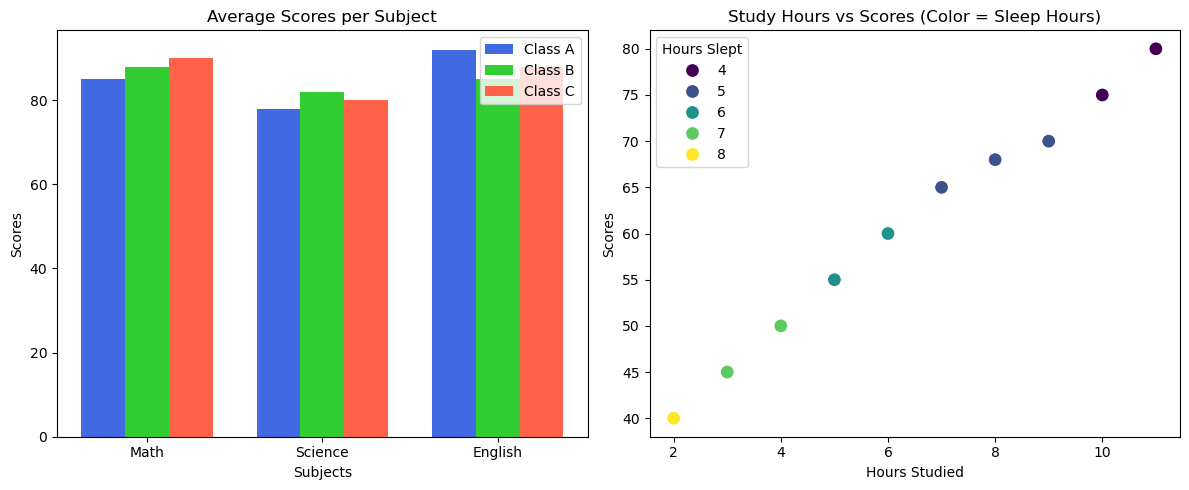

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafik 1: Multi-bar chart
axes[0].bar(x - width, class_A, width, label='Class A', color='royalblue')
axes[0].bar(x, class_B, width, label='Class B', color='limegreen')
axes[0].bar(x + width, class_C, width, label='Class C', color='tomato')
axes[0].set_title('Average Scores per Subject')
axes[0].set_xlabel('Subjects')
axes[0].set_ylabel('Scores')
axes[0].set_xticks(x)
axes[0].set_xticklabels(subjects)
axes[0].legend()

# Grafik 2: Scatter plot dengan seaborn
sns.scatterplot(x='Hours Studied', y='Scores', hue='Hours Slept', palette='viridis', data=df, s=100, ax=axes[1])
axes[1].set_title('Study Hours vs Scores (Color = Sleep Hours)')

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Titanic-Dataset.csv')

print("Data berhasil dimuat")
print("Data awal")
print(df.head())
      

Data berhasil dimuat
Data awal
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

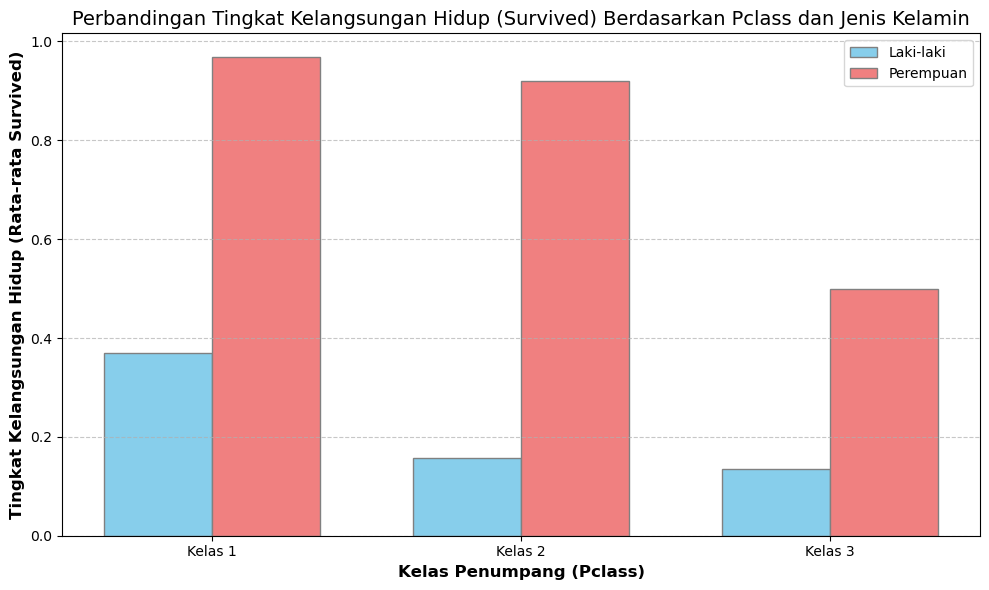

In [6]:
# Menggunakan kolom 'Survived' dan 'Pclass'
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# --- Membuat Multi-Bar Chart dengan Matplotlib ---

bar_width = 0.35
r1 = range(len(survival_rate.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, survival_rate['male'], color='skyblue', width=bar_width, edgecolor='grey', label='Laki-laki')
plt.bar(r2, survival_rate['female'], color='lightcoral', width=bar_width, edgecolor='grey', label='Perempuan')
plt.xlabel('Kelas Penumpang (Pclass)', fontweight='bold', fontsize=12)
plt.ylabel('Tingkat Kelangsungan Hidup (Rata-rata Survived)', fontweight='bold', fontsize=12)
plt.title('Perbandingan Tingkat Kelangsungan Hidup (Survived) Berdasarkan Pclass dan Jenis Kelamin', fontsize=14)
plt.xticks([r + bar_width/2 for r in r1], survival_rate.index.map({0.0: 'Kelas 1', 0.5: 'Kelas 2', 1.0: 'Kelas 3'}))

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Untuk menyesuaikan layout
plt.show()

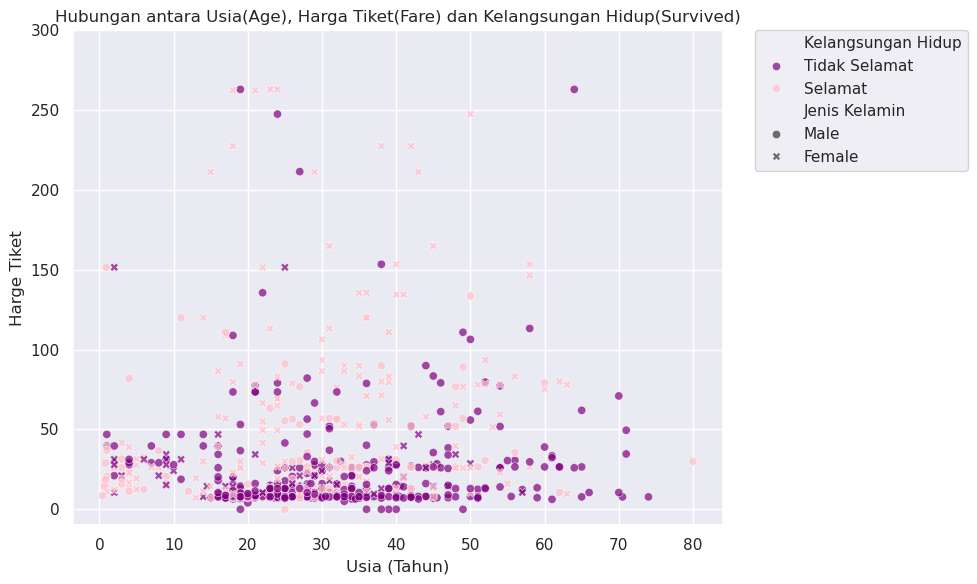

In [16]:
import seaborn as sns

sns.set_theme(style= 'darkgrid')
plt.figure(figsize=(10,6))

scatter_plot = sns.scatterplot(
    data = df, x = 'Age', y = 'Fare', hue = 'Survived',
    style = 'Sex', palette = {0: 'purple', 1: 'pink'}, alpha = 0.7
)

plt.title("Hubungan antara Usia(Age), Harga Tiket(Fare) dan Kelangsungan Hidup(Survived)")
plt.xlabel("Usia (Tahun)")
plt.ylabel("Harge Tiket")

handles, labels = scatter_plot.get_legend_handles_labels()
try:
    sep_idx = labels.index('Sex')
except ValueError:
    sep_idx = len(labels)

new_labels = []
new_handles = []
new_labels.append('Kelangsungan Hidup')
new_handles.append(handles[0])
new_labels.extend(['Tidak Selamat', 'Selamat'])
new_handles.extend(handles[1:3])
new_labels.append('Jenis Kelamin')
new_handles.append(handles[sep_idx])
new_labels.extend(['Male', 'Female'])
new_handles.extend(handles[sep_idx+1:])

scatter_plot.legend(new_handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim(-10, 300) 

plt.tight_layout()